In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as opt
import pandas as pd

In [2]:
plt.rcParams.update({'font.size': 18})

In [3]:
# Total enzyme concentration and inhibition constant

In [4]:
E = 1e-9
# Ki = 1e-10

In [5]:
# Define quadratic binding equation (denoted as inhibition_curve)
# and 20-point titration series of the inhibitor

In [6]:
I = np.geomspace(5e-11, 1e-6, 10)

def inhibition_curve(I, E, Ki):
    return 100 * (E + I + Ki - np.sqrt((E + I + Ki)**2 - 4 * E * I))/(2 * E)

In [7]:
# Define 2-parametric logistic curve, something that produces IC50 values

In [8]:
def logistic_2p(x, ic50, h):
    return 100 - 100/(1 + (x/ic50)**h)

In [9]:
# Hill-alike slope factor h takes into account curve steepness,
# and often does not have mechanistic sense in inhibition
# curve analysis.

Text(0, 0.5, 'Inhibition, %')

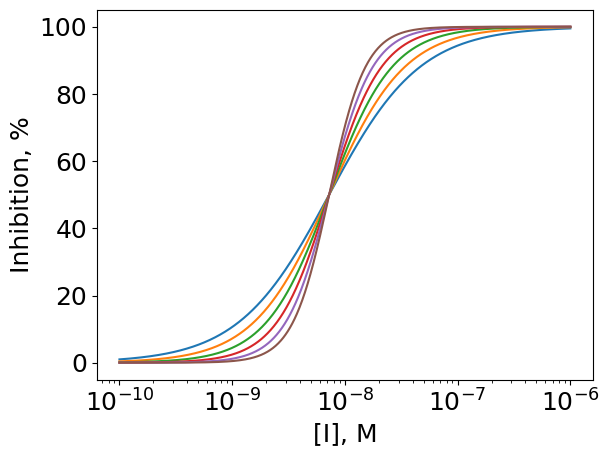

In [10]:
plt.xscale("log")
for h in np.geomspace(1, 2.5, 6):
    plt.plot(np.geomspace(1e-10, 1e-6, 1000), logistic_2p(np.geomspace(1e-10, 2e-6, 1000), 1e-8, h))
    
plt.xlabel('[I], M')
plt.ylabel('Inhibition, %')

In [11]:
# However, below it will be shown how running the inhibitors with Ki at
# and below assay has an influence over h parameter.

In [12]:
# Simulate set of inhibition curves using Morrison equation, fit them
# using 2-parametric logistic curve. Pay attention on how Hill-alike slope
# factor increases when the assay wall is approached/breached.

/tmp/ipykernel_271/1830207573.py:2: RuntimeWarning: invalid value encountered in power
  return 100 - 100/(1 + (x/ic50)**h)


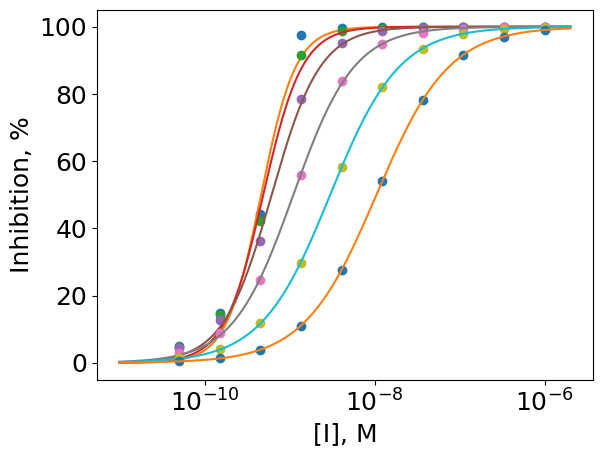

In [13]:
fit_results = pd.DataFrame()
plt.xscale("log")
for Ki in np.geomspace(1e-11, 1e-8, 6):
    optimizedParameters, pcov = opt.curve_fit(logistic_2p, I, inhibition_curve(I,E,Ki))
    plt.plot(I, inhibition_curve(I, E, Ki),'o')
    plt.plot(np.geomspace(1e-11, 2e-6, 1000), logistic_2p(np.geomspace(1e-11, 2e-6, 1000), *optimizedParameters), label="fit")
    optimizedParameters = np.insert(optimizedParameters, 0, Ki)
    fit_results = pd.concat([fit_results, pd.DataFrame([optimizedParameters])], ignore_index=True)

plt.xlabel('[I], M')
plt.ylabel('Inhibition, %')

# Some clean up
fit_results.columns = ['Ki, M', 'IC50, M', 'h']


In [14]:
fit_results

,"Ki, M","IC50, M",h
0,1.000000e-11,4.624425e-10,2.127018
1,3.981072e-11,4.905886e-10,1.895607
2,1.584893e-10,6.155338e-10,1.520424
3,6.309573e-10,1.108566e-09,1.216110
4,2.511886e-09,3.003551e-09,1.069324
5,1.000000e-08,1.049755e-08,1.018842


In [15]:
# Let's visualize how h-factor relates to the assay walL (E/2)

/tmp/ipykernel_271/1830207573.py:2: RuntimeWarning: invalid value encountered in power
  return 100 - 100/(1 + (x/ic50)**h)


Text(0, 0.5, 'Hill coefficient')

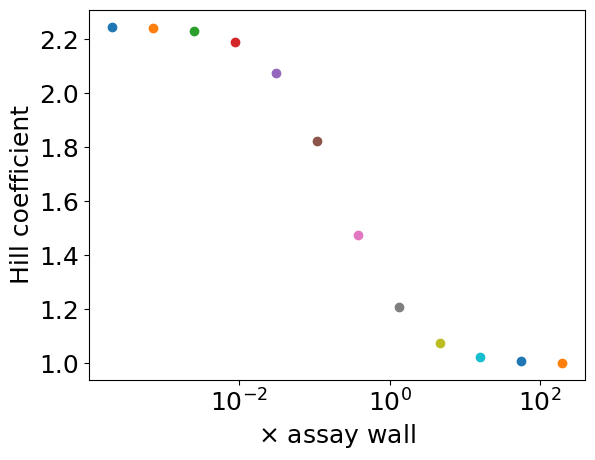

In [16]:
plt.xscale('log')
for Ki in np.geomspace(1e-13, 1e-7, 12):
    optimizedParameters, pcov = opt.curve_fit(logistic_2p, I, inhibition_curve(I,E,Ki))
    plt.plot((2*Ki)/E, optimizedParameters[1], 'o')

plt.xlabel(r'$\times$ assay wall')
plt.ylabel('Hill coefficient')